In [2]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Cleaned_Data.csv')
df

,Month,Ayr Hospital,BARCALDINE HOSPITAL,BLACKALL HOSPITAL,Beaudesert Hospital,Biloela Hospital,Caloundra Hospital,Capricorn Coast Hospital,Charleville Hospital,Charters Towers Hospital,...,Longreach Hospital,Oakey Hospital,Proserpine Hospital,Roma Hospital,St George Hospital,Stanthorpe Hospital,Thursday Island Hospital,WINTON HOSPITAL,Warwick Hospital,Weipa Hospital
0,2015-07-01,822.0,241.0,171.0,1175.0,524.0,0.0,1019.0,514.0,805.0,...,405.0,186.0,915.0,810.0,484.0,574.0,364.0,125.0,1476.0,656.0
1,2015-08-01,971.0,287.0,167.0,1408.0,523.0,0.0,1086.0,603.0,837.0,...,421.0,235.0,1110.0,836.0,562.0,713.0,374.0,140.0,1733.0,564.0
2,2015-09-01,881.0,226.0,159.0,1186.0,415.0,0.0,1029.0,555.0,792.0,...,416.0,221.0,841.0,806.0,541.0,612.0,370.0,177.0,1609.0,533.0
3,2015-10-01,885.0,222.0,133.0,1232.0,482.0,0.0,1071.0,446.0,766.0,...,362.0,207.0,875.0,772.0,462.0,585.0,465.0,115.0,1602.0,523.0
4,2015-11-01,833.0,169.0,137.0,1250.0,579.0,0.0,1137.0,472.0,776.0,...,329.0,202.0,870.0,741.0,410.0,596.0,456.0,145.0,1596.0,567.0
5,2015-12-01,857.0,118.0,201.0,1190.0,488.0,0.0,1186.0,383.0,767.0,...,408.0,218.0,948.0,698.0,523.0,719.0,454.0,107.0,1649.0,591.0
6,2016-01-01,950.0,124.0,216.0,1239.0,478.0,0.0,1126.0,476.0,763.0,...,393.0,231.0,940.0,721.0,485.0,728.0,398.0,128.0,1646.0,540.0
7,2016-02-01,854.0,120.0,153.0,1193.0,500.0,0.0,1048.0,619.0,789.0,...,379.0,231.0,831.0,758.0,412.0,711.0,414.0,118.0,1619.0,663.0
8,2016-03-01,952.0,106.0,171.0,1271.0,558.0,0.0,1150.0,492.0,819.0,...,415.0,222.0,936.0,816.0,452.0,915.0,482.0,120.0,1753.0,633.0
9,2016-04-01,929.0,206.0,168.0,1152.0,582.0,0.0,1200.0,534.0,747.0,...,456.0,223.0,906.0,674.0,455.0,786.0,404.0,96.0,1571.0,541.0


In [4]:
#select one hospital
Charleville_hosp = df[['Month', 'Charleville Hospital']]
Charleville_hosp 

,Month,Charleville Hospital
0,2015-07-01,514.0
1,2015-08-01,603.0
2,2015-09-01,555.0
3,2015-10-01,446.0
4,2015-11-01,472.0
5,2015-12-01,383.0
6,2016-01-01,476.0
7,2016-02-01,619.0
8,2016-03-01,492.0
9,2016-04-01,534.0


In [5]:
# Sorting Data of hospital and make month as index

Charleville_hosp_sorted= Charleville_hosp.sort_values('Month')
Charleville_hosp_sorted = Charleville_hosp.groupby('Month')['Charleville Hospital'].sum().reset_index()
Charleville_hosp_sorted = Charleville_hosp.set_index('Month')
Charleville_hosp_sorted.index
train=Charleville_hosp_sorted[0:31] 
test=Charleville_hosp_sorted[30:]
test_long =Charleville_hosp_sorted[2:]
test

,Charleville Hospital
Month,
2018-01-01,611.0
2018-02-01,446.0
2018-03-01,404.0
2018-04-01,416.0
2018-05-01,425.0
2018-06-01,397.0


In [71]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [73]:
# try to get the best combination for parameters of ARIMA

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:462.507114596859
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:271.4653722566426
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:96.23985944096076
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:204.52319735796337
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:72.98331834620481
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:71.10585519658092
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:217.5393657056247
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:208.28845905234465
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:72.65936852913546
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:85.89841007034335
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:74.58852495519855
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:86.61446546130466
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:88.614687930233

ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:209.64028499744649
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:200.28306559479293
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:59.02395158639099
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:67.1596001641852
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:57.240032767305856
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:68.56824811837541
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:70.56824830957696
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:60.825625968920136
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:318.58123476302666
ARIMA(0

ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:67.12214191692782
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:69.12214190395684
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:71.1221419086289
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:319.8048944488712
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:183.30401100929242
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:56.50148048806706
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:188.69406389023266
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:44.88273129034892
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:41.00160879740302
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:193.93879075774458
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 

ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:332.8236820816165
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:193.3977224904809
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:70.87936440130679
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:196.15985979074674
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:62.17280524970518
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:64.7740764851566
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:193.5542191434433
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:193.83194383064776
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:56.66317819525622
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:62.062791569073916
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:63.57363237558422
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x

ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:23.35046189695039
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:nan
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:177.41382230803978
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:177.9125523798393
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:10.738372700728691
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:4.763827002149018
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:31.247960396072312
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:20.20773454231645
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:10.87212653773397
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:5.854686802640636
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:12.0

In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:462.507114596859
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:271.4653722566426
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:204.52319735796337
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:72.98331834620481
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:217.5393657056247
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:208.28845905234465
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:85.89841007034335
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:74.58852495519855
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:417.2148402307064
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:241.2058919102
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:196.04618222941227
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:59.79462047329481
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:219.53915399034335
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:199.93966529120323
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:85.28493214238702
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:61.352544317393935
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:337.5210705109646
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:195.93886261791855
ARIMA(0

In [70]:
import itertools
#set parameter range
p = range(0,3)
q = range(0,3)
d = range(0,2)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 7.674674
         Iterations: 1
         Function evaluations: 15
SARIMA(0, 0, 0),(0, 0, 0, 12) - AIC:477.8298000964538
Optimization terminated successfully.
         Current function value: 7.380263
         Iterations: 2
         Function evaluations: 130
SARIMA(0, 0, 0),(0, 0, 1, 12) - AIC:461.5763140127976
Optimization terminated successfully.
         Current function value: 7.227916
         Iterations: 2
         Function evaluations: 241
SARIMA(0, 0, 0),(0, 0, 2, 12) - AIC:454.13081321523106
Optimization terminated successfully.
         Current function value: 3.445149
         Iterations: 2
         Function evaluations: 37
SARIMA(0, 0, 0),(0, 1, 0, 12) - AIC:215.59926487430795
Optimization terminated successfully.
         Current function value: 3.444114
         Iterations: 2
         Function evaluations: 45
SARIMA(0, 0, 0),(0, 1, 1, 12) - AIC:217.53504525186997
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 6.219088
         Iterations: 14
         Function evaluations: 868
SARIMA(0, 0, 2),(1, 0, 1, 12) - AIC:395.583436846651
Optimization terminated successfully.
         Current function value: 6.217696
         Iterations: 13
         Function evaluations: 958
SARIMA(0, 0, 2),(1, 0, 2, 12) - AIC:397.4971560348107
Optimization terminated successfully.
         Current function value: 3.406369
         Iterations: 3
         Function evaluations: 143
SARIMA(0, 0, 2),(1, 1, 0, 12) - AIC:219.194852271956
Optimization terminated successfully.
         Current function value: 3.406367
         Iterations: 3
         Function evaluations: 185
SARIMA(0, 0, 2),(1, 1, 1, 12) - AIC:221.19475122258703
Optimization terminated successfully.
         Current function value: 3.405791
         Iterations: 3
         Function evaluations: 223
SARIMA(0, 0, 2),(1, 1, 2, 12) - AIC:223.1590722797694
Optimization terminated successfully.
 

Optimization terminated successfully.
         Current function value: 5.364713
         Iterations: 3
         Function evaluations: 213
SARIMA(0, 1, 1),(2, 0, 2, 12) - AIC:344.6121809663886
Optimization terminated successfully.
         Current function value: 3.310985
         Iterations: 3
         Function evaluations: 135
SARIMA(0, 1, 1),(2, 1, 0, 12) - AIC:213.28105586497242
Optimization terminated successfully.
         Current function value: 3.310986
         Iterations: 3
         Function evaluations: 168
SARIMA(0, 1, 1),(2, 1, 1, 12) - AIC:215.2811613530926
Optimization terminated successfully.
         Current function value: 3.310986
         Iterations: 3
         Function evaluations: 203
SARIMA(0, 1, 1),(2, 1, 2, 12) - AIC:217.28115884654096
Optimization terminated successfully.
         Current function value: 5.387241
         Iterations: 2
         Function evaluations: 153
SARIMA(0, 1, 2),(0, 0, 0, 12) - AIC:340.0089441294884
Optimization terminated successfully.


Optimization terminated successfully.
         Current function value: 3.444010
         Iterations: 2
         Function evaluations: 91
SARIMA(1, 0, 1),(0, 1, 1, 12) - AIC:221.52863694139427
Optimization terminated successfully.
         Current function value: 3.443006
         Iterations: 3
         Function evaluations: 172
SARIMA(1, 0, 1),(0, 1, 2, 12) - AIC:223.46634285821085
Optimization terminated successfully.
         Current function value: 5.614378
         Iterations: 11
         Function evaluations: 508
SARIMA(1, 0, 1),(1, 0, 0, 12) - AIC:356.0914293144927
Optimization terminated successfully.
         Current function value: 5.615536
         Iterations: 6
         Function evaluations: 350
SARIMA(1, 0, 1),(1, 0, 1, 12) - AIC:358.16322359328717
Optimization terminated successfully.
         Current function value: 5.620100
         Iterations: 7
         Function evaluations: 498
SARIMA(1, 0, 1),(1, 0, 2, 12) - AIC:360.4462057600241
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 3.377737
         Iterations: 2
         Function evaluations: 122
SARIMA(1, 1, 0),(1, 1, 2, 12) - AIC:219.41970242534654
Optimization terminated successfully.
         Current function value: 5.510954
         Iterations: 4
         Function evaluations: 178
SARIMA(1, 1, 0),(2, 0, 0, 12) - AIC:349.6791453196335
Optimization terminated successfully.
         Current function value: 5.511009
         Iterations: 3
         Function evaluations: 170
SARIMA(1, 1, 0),(2, 0, 1, 12) - AIC:351.6825311624814
Optimization terminated successfully.
         Current function value: 5.510998
         Iterations: 3
         Function evaluations: 203
SARIMA(1, 1, 0),(2, 0, 2, 12) - AIC:353.6818960910573
Optimization terminated successfully.
         Current function value: 3.377727
         Iterations: 2
         Function evaluations: 100
SARIMA(1, 1, 0),(2, 1, 0, 12) - AIC:217.4190635774446
Optimization terminated successfully.
 

SARIMA(2, 0, 0),(0, 0, 0, 12) - AIC:366.6126057631445
Optimization terminated successfully.
         Current function value: 5.795387
         Iterations: 3
         Function evaluations: 143
SARIMA(2, 0, 0),(0, 0, 1, 12) - AIC:367.31400277618417
Optimization terminated successfully.
         Current function value: 5.760903
         Iterations: 4
         Function evaluations: 241
SARIMA(2, 0, 0),(0, 0, 2, 12) - AIC:367.17595892943336
Optimization terminated successfully.
         Current function value: 3.442073
         Iterations: 2
         Function evaluations: 69
SARIMA(2, 0, 0),(0, 1, 0, 12) - AIC:219.40852145016424
Optimization terminated successfully.
         Current function value: 3.441563
         Iterations: 2
         Function evaluations: 91
SARIMA(2, 0, 0),(0, 1, 1, 12) - AIC:221.37693627518382
Optimization terminated successfully.
         Current function value: 3.441030
         Iterations: 2
         Function evaluations: 118
SARIMA(2, 0, 0),(0, 1, 2, 12) - AIC:22

Optimization terminated successfully.
         Current function value: 5.579432
         Iterations: 5
         Function evaluations: 488
SARIMA(2, 0, 2),(1, 0, 2, 12) - AIC:361.9247654457278
Optimization terminated successfully.
         Current function value: 3.388200
         Iterations: 5
         Function evaluations: 401
SARIMA(2, 0, 2),(1, 1, 0, 12) - AIC:222.06839139902655
Optimization terminated successfully.
         Current function value: 3.388190
         Iterations: 5
         Function evaluations: 469
SARIMA(2, 0, 2),(1, 1, 1, 12) - AIC:224.06775352247456
Optimization terminated successfully.
         Current function value: 3.388033
         Iterations: 5
         Function evaluations: 524
SARIMA(2, 0, 2),(1, 1, 2, 12) - AIC:226.05803921740392
Optimization terminated successfully.
         Current function value: 5.577786
         Iterations: 6
         Function evaluations: 516
SARIMA(2, 0, 2),(2, 0, 0, 12) - AIC:359.8227406034462
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 3.192037
         Iterations: 6
         Function evaluations: 441
SARIMA(2, 1, 1),(2, 1, 0, 12) - AIC:209.90627853987655
Optimization terminated successfully.
         Current function value: 3.192216
         Iterations: 5
         Function evaluations: 428
SARIMA(2, 1, 1),(2, 1, 1, 12) - AIC:211.91736171191124
Optimization terminated successfully.
         Current function value: 3.192160
         Iterations: 5
         Function evaluations: 489
SARIMA(2, 1, 1),(2, 1, 2, 12) - AIC:213.91389695057745
Optimization terminated successfully.
         Current function value: 5.363298
         Iterations: 3
         Function evaluations: 178
SARIMA(2, 1, 2),(0, 0, 0, 12) - AIC:342.52450625400854
Optimization terminated successfully.
         Current function value: 5.322059
         Iterations: 4
         Function evaluations: 341
SARIMA(2, 1, 2),(0, 0, 1, 12) - AIC:341.967629915383
Optimization terminated successfully.

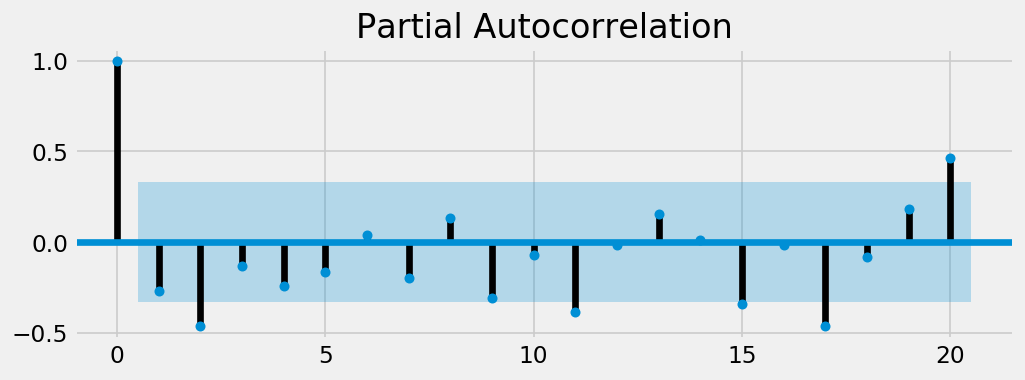

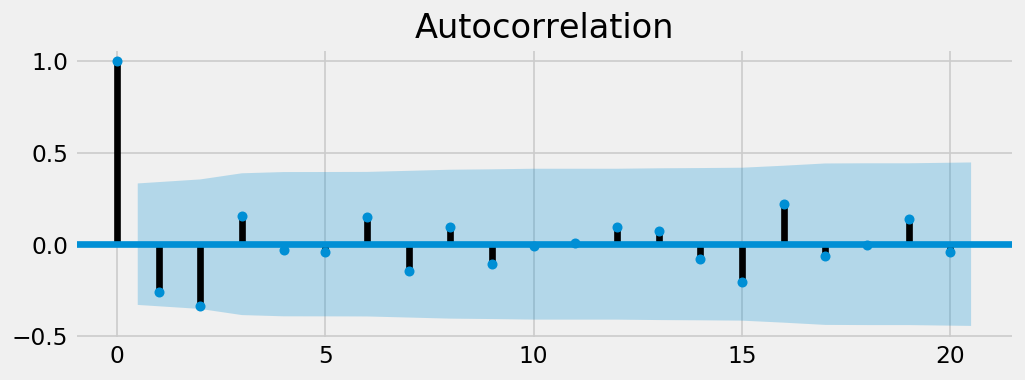

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(Charleville_hosp_sorted.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
# plot_pacf(Charleville_hosp_sorted.diff().dropna(), ax=axes[1])
plot_pacf(Charleville_hosp_sorted.diff().dropna(), lags=20)
plot_acf(Charleville_hosp_sorted.diff().dropna(),lags=20)
plt.show()

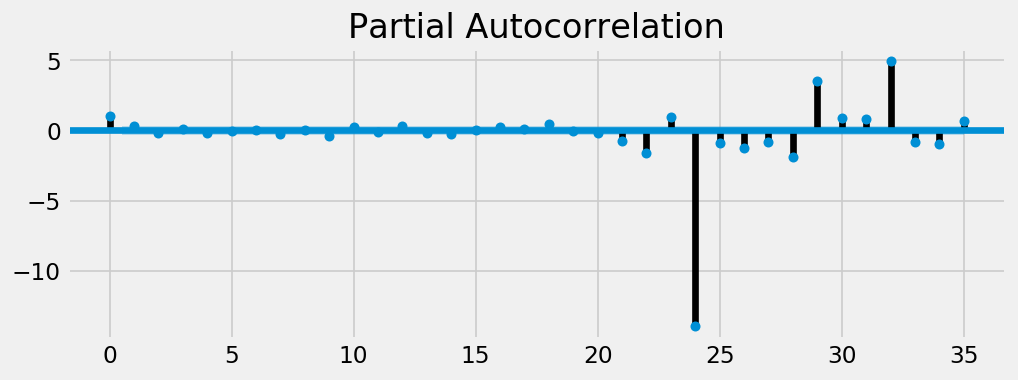

In [75]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
# series = read_csv(', header=0, index_col=0)
plot_pacf(Charleville_hosp_sorted, lags=50)
pyplot.show()

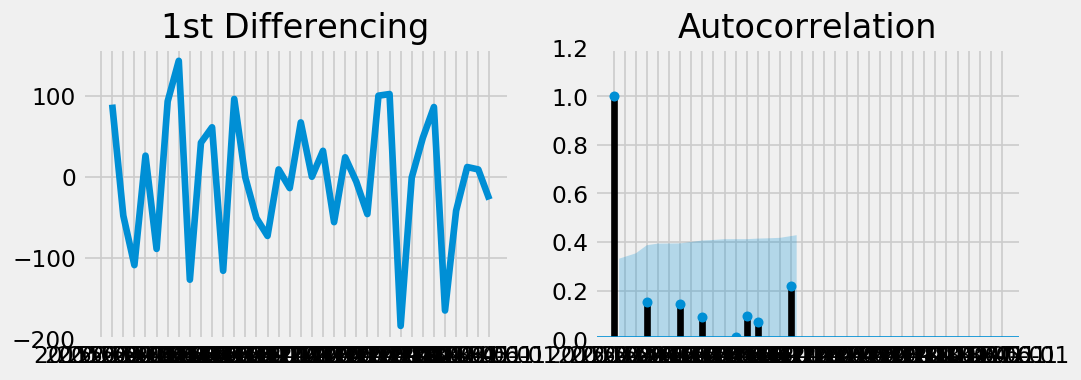

In [32]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Charleville_hosp_sorted.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(Charleville_hosp_sorted.diff().dropna(), ax=axes[1])

plt.show()

In [40]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(Charleville_hosp_sorted, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.Charleville Hospital   No. Observations:                   35
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -196.244
Method:                           css-mle   S.D. of innovations             63.124
Date:                    Tue, 12 May 2020   AIC                            400.488
Time:                            04:14:51   BIC                            406.709
Sample:                        08-01-2015   HQIC                           402.635
                             - 06-01-2018                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.6712      1.383     -1.209      0.227      -4.381       1.039
ar.L1.D.Charleville Hospital     0.2902      

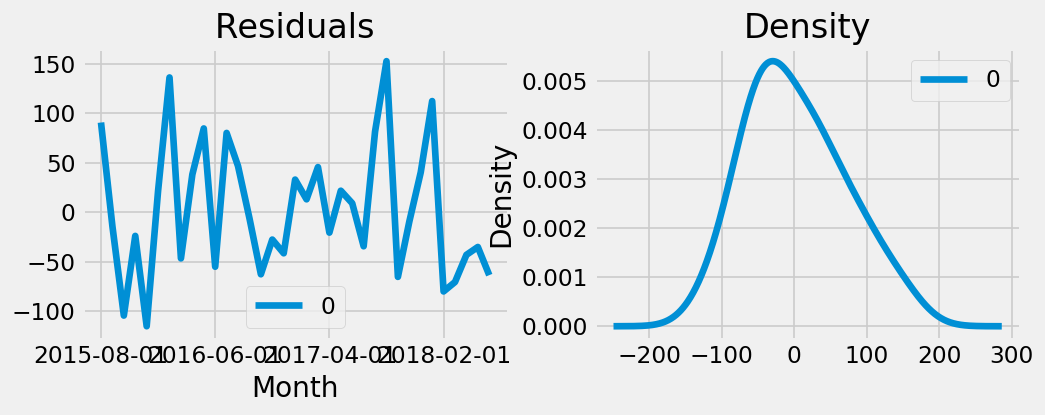

In [41]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

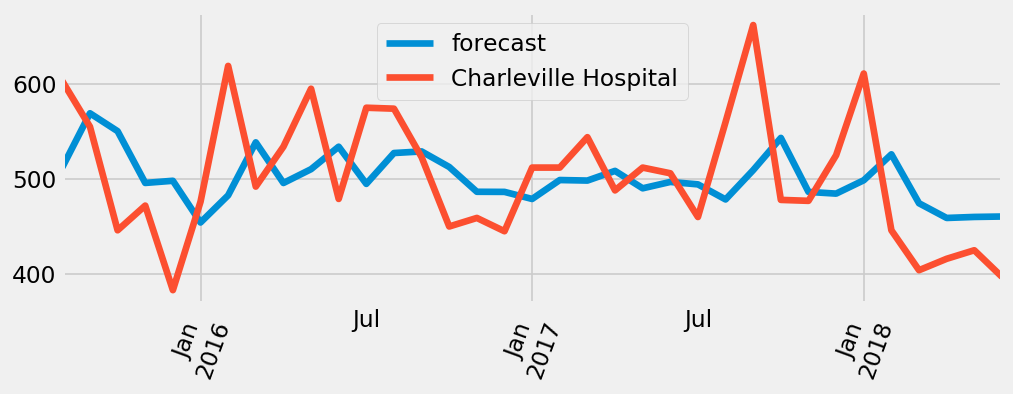

In [66]:
model_fit.plot_predict(dynamic=False)
plt.xticks(rotation=70)
plt.show()

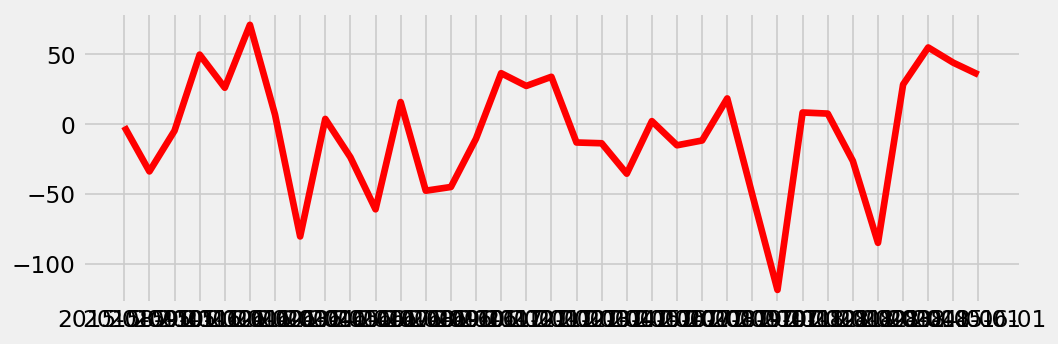

In [69]:
 
model_fit.fittedvalues
plt.plot(model_fit.fittedvalues, color='red')

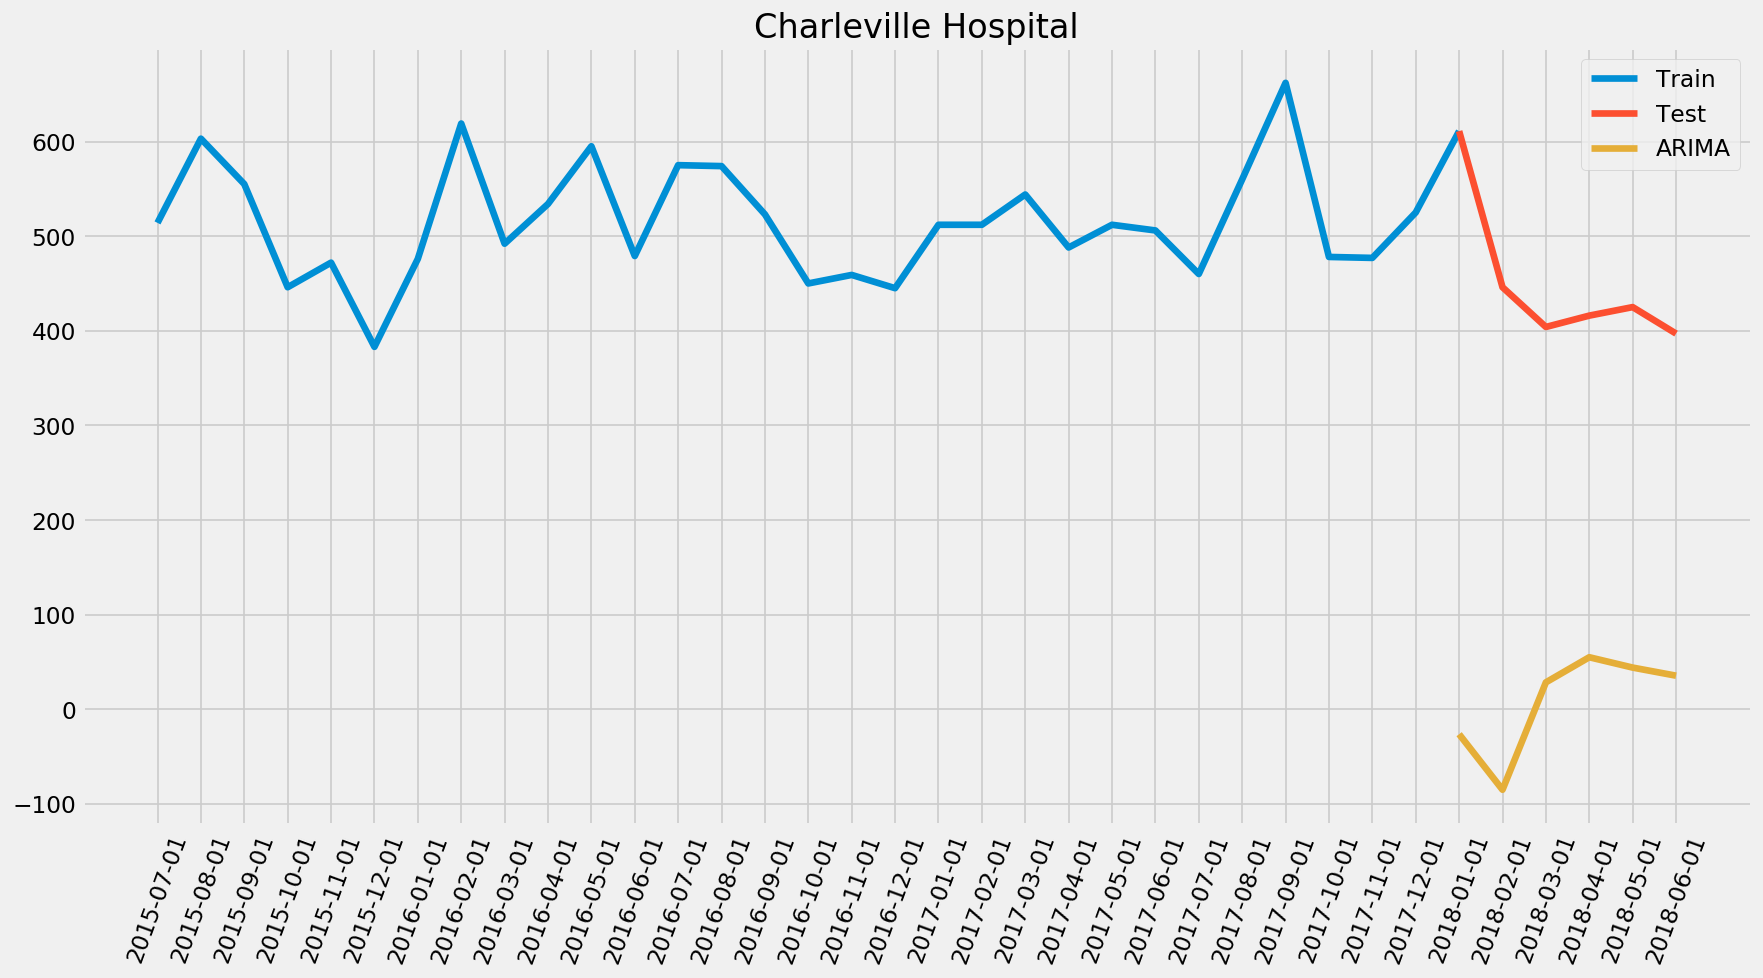

Month
2018-01-01   -26.344424
2018-02-01   -85.039413
2018-03-01    28.448902
2018-04-01    54.989595
2018-05-01    44.051540
2018-06-01    35.498871
Name: ARIMA, dtype: float64

In [62]:
arima_test = test.copy()
# x= model_fit.predict()

# arima_test['ARIMA'] = model_fit.predict(pd.to_datetime('2018-01-01'), dynamic=False)


plt.figure(figsize=(16,8))
plt.plot( train['Charleville Hospital'], label='Train')
plt.plot(test['Charleville Hospital'], label='Test')
plt.plot(arima_test['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.title("Charleville Hospital")
plt.show()
arima_test['ARIMA']

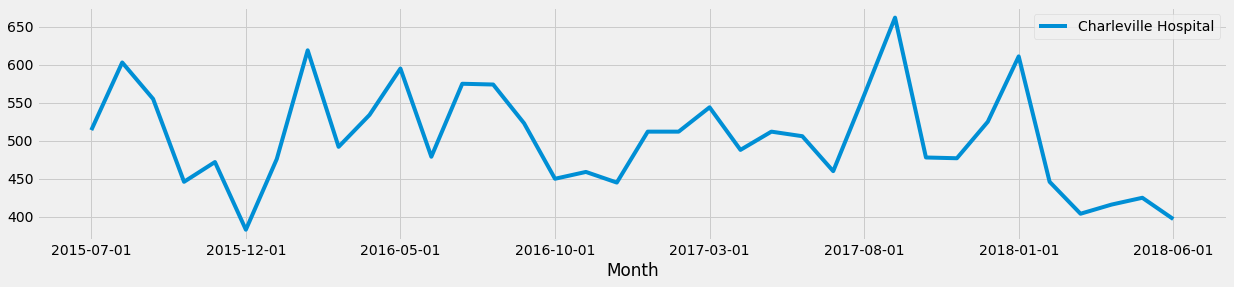

In [10]:
y = Charleville_hosp.set_index(['Month'])
y.head(5)
y.plot(figsize=(19, 4))
plt.show()

In [13]:
from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [88]:
mod_ARIMA = sm.tsa.statespace.SARIMAX(Charleville_hosp_sorted,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod_ARIMA.fit()
print(results.summary().tables[1])
print(results.summary())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5483      0.572      0.958      0.338      -0.574       1.670
ma.L1         -1.0000      0.593     -1.687      0.092      -2.162       0.162
ar.S.L12    8.957e-05      0.386      0.000      1.000      -0.757       0.757
sigma2      6208.1725   9.55e-05    6.5e+07      0.000    6208.172    6208.173
                                      SARIMAX Results                                      
Dep. Variable:                Charleville Hospital   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -58.142
Date:                             Tue, 12 May 2020   AIC                            124.283
Time:                                     18:21:46   BIC                            125.494
Sample:                                 07-01-2015   HQIC         

ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

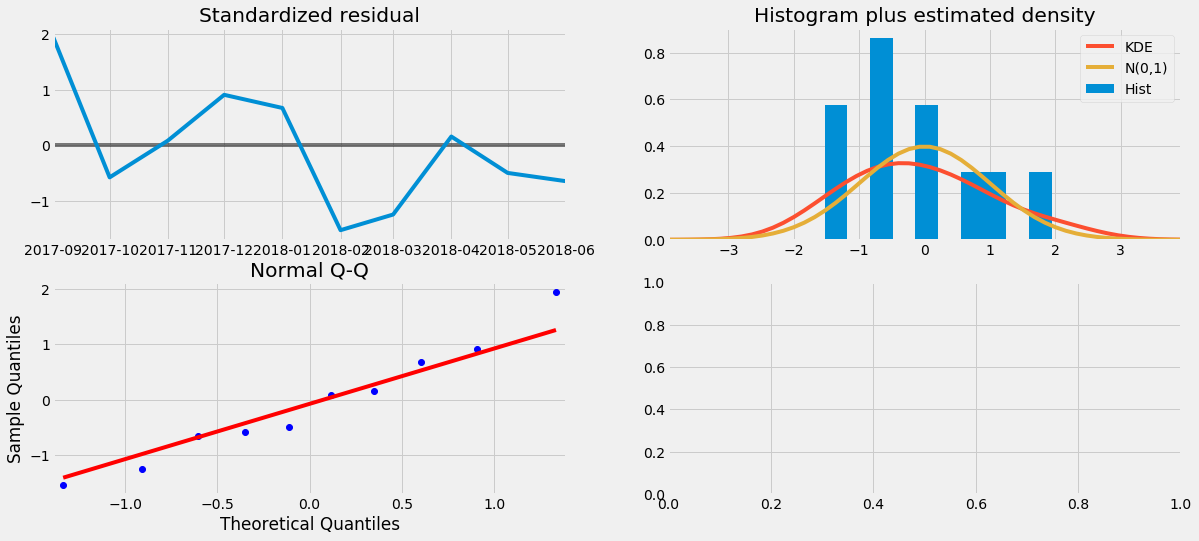

In [14]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

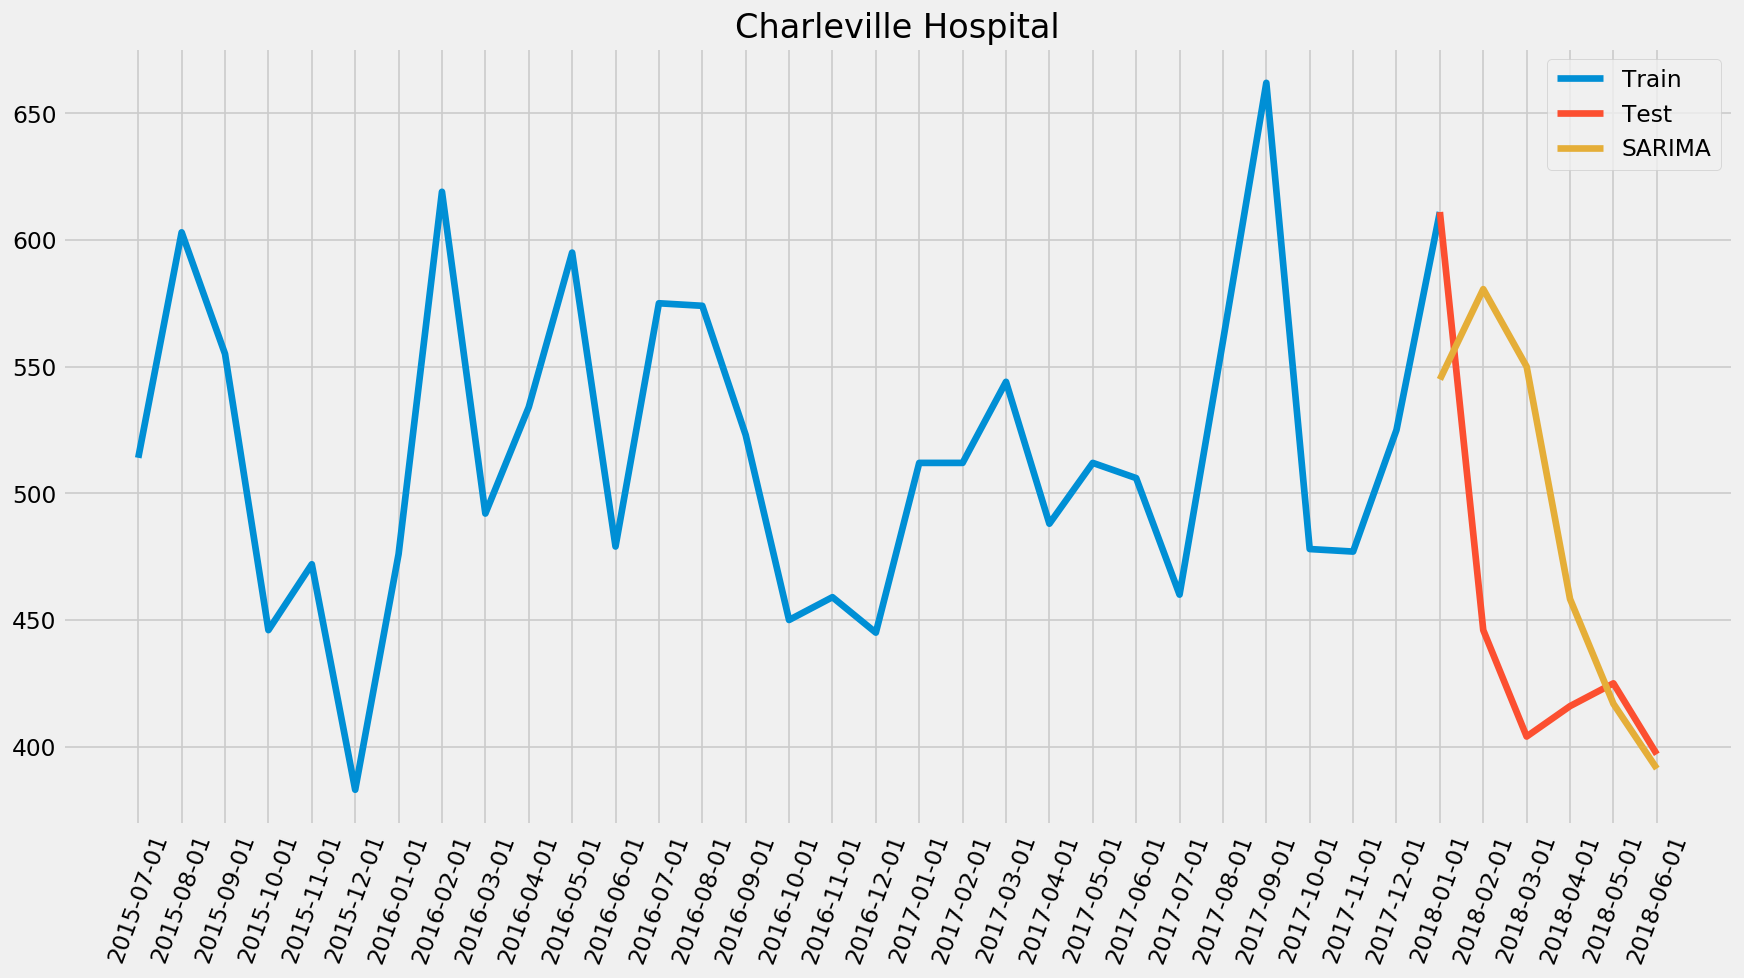

In [85]:
sarima_test = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(Charleville_hosp_sorted, order=(2, 1, 1),seasonal_order=(2,1,0,12) ,enforce_stationarity=False,
                                enforce_invertibility=False).fit()
sarima_test['SARIMA'] = fit1.predict(pd.to_datetime('2018-01-01'), dynamic=False)
plt.figure(figsize=(16,8))
plt.plot( train['Charleville Hospital'], label='Train')
plt.plot(test['Charleville Hospital'], label='Test')
plt.plot(sarima_test['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.title("Charleville Hospital")
plt.show()

In [86]:
rms_SARIMA = mean_squared_error(test ['Charleville Hospital'], sarima_test['SARIMA'])
print ('Mean Square Error for Holt is',rms_SARIMA )


print ('Root Mean Square Error for SARIMA is',pow(rms_SARIMA,0.5) )

Mean Square Error for Holt is 7611.668932659522
Root Mean Square Error for SARIMA is 87.24487911997771
